# **MEASURING CLASSIFIER PERFORMANCE**

## **For two-class problems**

Let us say we have a two-class problem: $\omega_1$ (the *positives*) and $\omega_2$ (the *negatives*).

So, there are four cases:
- For a positive example, if the prediction is also positive, that is a **true positive**.
- If prediction is negative for a positive example, this is a **false negative**.
- For a negative example, if the prediction is also negative, we have a **true negative**.
- If we predict a negative example as positive, we have a **false positive**.

> The **error probability of the false positive**, known as a **type I error**, is denoted by $\alpha$ (in which case the probability of the true positive is $1-\alpha$).

> The **error probability of a false negative**, known as a **type II error**, is denoted by $\beta$ (and the probability of a true negative is $1-\beta$).

A **confusion matrix** is a table that illustrates how well a classifier predicts.

<table border="1" style="border-collapse: collapse; text-align: center;">
   <caption style="font-weight: bold; margin-bottom: 10px;"> <b>Confusion Matrix for the two-class problem.</b></caption>
  <tr>
    <th rowspan="2">True Class</th>
    <th colspan="2">Predicted Class</th>
    <th rowspan="2">Total</th>
  </tr>
  <tr>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td><b>Positive</b></td>
    <td>tp : true positive</td>
    <td>fn : false negative</td>
    <td>p</td>
  </tr>
  <tr>
    <td><b>Negative</b></td>
    <td>fp : false positive</td>
    <td>tn : true negative</td>
    <td>n</td>
  </tr>
  <tr>
    <td><b>Total</b></td>
    <td>p'</td>
    <td>n'</td>
    <td>N</td>
  </tr>
</table>

**Main performance measures**

> **Total Error**
$$e = \frac{fp+fn}{N}=\alpha + \beta$$

> **Accuracy** (*exactitud*), measures the proportion of correct predictions in relation to the total number of elements.
$$\frac{tp+tn}{N} = 1- e$$

> **False alarm rate** (**false positive fraction**) $fp$-rate is the proportion of impostors we wrongly accept.
$$\frac{fp}{n}=\alpha$$

> **True positive rate**, **recall** or **sensitivity** $tp$-rate, measures what proportion of valid users (positive pattern) we authenticate. Intuitively, it is the ability of the classifier to find all the positive samples.
$$ \frac{tp}{p}=1-\alpha$$

> **Precision** measures the proportion of records classified as positive that actually are. Intuitively, precision is the ability to the classifier not to label as positive a sample that is negative.
$$\frac{tp}{p'}$$

> **Specificity** is how well we detect the negatives.
$$\frac{tn}{n} = 1 - fp\text{-rate}$$


## **For $K$-classes problem with $K>2$**

In the case of $K>2$ classes, the **class confusion matrix** $A$ is a $K\times K$ matrix whose entry $A(i, j)$ contains the number of instances that belong to class $C_i$  but are assigned to class $C_j$.


- Usually organized as actual rows versus predicted columns.

- The class confusion matrix allows us to identify what types of misclassifications occur, namely, if there are two classes that are frequently confused.

Let $n_i$ be the number of elements in the class $C_i$, and let $\hat{n}_i$ the number of instances assigned to class $C_i$, that is

$$n_i = \sum_{l=1}^K A(i,l)$$

$$\hat{n}_i= \sum_{l=1}^K A(l,i)$$


From the **confusion matrix**, one can directly extract the **recall** and **precision** values for each class, along with the overall accuracy:

> **Overall Accuracy** $Ac$, is the percentage of data that has been correctly classified. Given a $K$-class problem, $Ac$ is computed form the diagonal of the confusion matrix:
$$Ac = \frac{1}{N}\sum_{i=1}^K A(i,i)$$

> **Balanced accuracy** $BA$, is defined as the average of recall obtained on each class.
$$BA = \frac{1}{K} \sum_{i=1}^{K} \frac{A(i,i)}{n_i} $$
- $BA$ avoids inflated performance estimates on imbalanced datasets.
- It is equivalent to the **Accuracy** with class-balanced sample weights.

> **Precision** $P_i$ is the proportion of data points classified as class $i$, whose true class label is indeed $i$. That is, the value of the diagonal $i$ divided by the sum of the column $i$.
$$P_i =\frac{A(i,i)}{\hat{n}_i}$$

> **Recall** or **Sensitivity** $R_i$, is the proportion of data points with true class label $i$, which were correctly classified in that class. That is, the value of the diagonal $i$ divided by the sum of the row $i$.
$$R_i = \frac{A(i,i)}{n_i}$$


> **F1-Score**, also known as **balanced $F$-score**, can be interpreted as a harmonic mean of the precision and recall.
$$ F1(C_i) = 2\frac{P_i R_i}{P_i+R_i}$$
- An $F1$ score reaches its best value at 1 and worst score at 0.
- The relative contribution of precision and recall to the F1-score are equal.

> **$F_{\beta}$-Score** is the weighted harmonic mean of precision and recall, with precision's contribution to the mean weighted by some parameter $\beta\geq 0$
$$F_{\beta} = (1+\beta^2) \frac{P_i R_i}{\beta^2 P_i + R_i}$$
- $\beta > 1$ gives more weight to recall.
- $\beta < 1$ favors precision.
- Asymptotically, $\beta \rightarrow \infty$ consider only recall, and $\beta \rightarrow 0$ only precision.

# **Implementation**

**Scikit-learn** (**sklearn**) is a free and open-source machine learning library for the Python programming language.

- It is designed to operate with the Python numerical and scientific libraries **NumPy** and **SciPy**.
- Originally, it was a Google Summer of Code project by French Data scientist David Couperneau.
- In 2010, the first public version of the library by a research group of the French Institute for Research in Computer Science and Automation.

**Sklearn** include modules for:
- Classification.
- Regression.
- Clustering.
- Dimensionality reduction.
- Model selection.
- Preprocessing.

It also includes **metrics and scoring** submodule to evaluate supervised learning models. To import it we use the following code:

In [1]:
from sklearn import metrics

## **Example**

We use the iris dataset and the perceptron dataset to show how to use the different metric functions in sklearn.

In [2]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [3]:
# Import dataset
from sklearn.datasets import load_iris
X = load_iris()["data"][:130,0:2]
y_true = load_iris()["target"][:130]

In [4]:
# Create and apply the classifier
clf = LinearSVC(max_iter=5)
clf.fit(X, y_true)
y_pred = clf.predict(X)

c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\herie\AppData\Local\Temp\ipykernel_16892\1494447525.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  display.ax_.scatter([], [], c=cmap(i), label=i)


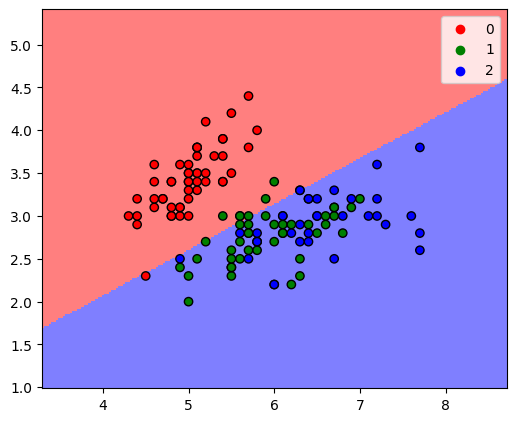

In [5]:
# Display the decision boundaries of the classifier
cmap = ListedColormap(['red', 'green', 'blue'])
fig, ax = plt.subplots(figsize=(6, 6))
display = DecisionBoundaryDisplay.from_estimator(clf, X,
                                                 response_method="predict",
                                                 alpha=0.5, ax=ax,
                                                 grid_resolution=200,
                                                 plot_method="pcolormesh",
                                                cmap=cmap)
display.ax_.scatter(X[:, 0], X[:, 1], c=y_true, edgecolor="k", cmap=cmap)
for i in range(3):
    display.ax_.scatter([], [], c=cmap(i), label=i)
ax.legend()
ax.set_aspect("equal")
plt.show()

### Confusion matrix

In [6]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[49,  1,  0],
       [ 6, 44,  0],
       [ 0, 30,  0]], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix

# True labels
y_true = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

# Predicted labels
y_pred = [1, 1, 1, 1, 2, 2, 2, 3, 3, 4]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 0 0 0]
 [2 0 0 0]
 [1 2 0 0]
 [0 1 2 1]]


[[1 0 0 0]
 [2 0 0 0]
 [1 2 0 0]
 [0 1 2 1]]


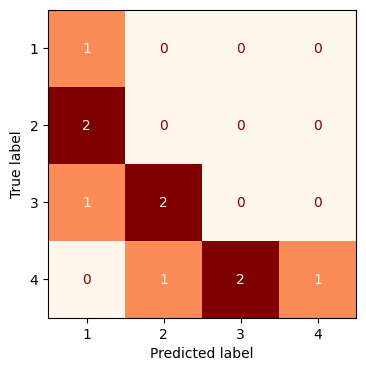

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# True labels
y_true = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

# Predicted labels
y_pred = [1, 1, 1, 1, 2, 2, 2, 3, 3, 4]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4])
disp.plot(cmap="OrRd", ax=ax, colorbar=False)
plt.show()

### Metrics

In [ ]:
# Accuracy
metrics.accuracy_score(y_true, y_pred)

0.2

In [ ]:
# Balanced accuracy
metrics.balanced_accuracy_score(y_true, y_pred)

0.3125

In [ ]:
# Precision
metrics.precision_score(y_true, y_pred,
                        average=None)

array([0.25, 0.  , 0.  , 1.  ])

In [ ]:
# Recall
metrics.recall_score(y_true, y_pred,
                     average=None)

array([1.  , 0.  , 0.  , 0.25])

In [ ]:
# F1-score
metrics.f1_score(y_true, y_pred,
                 average=None)

array([0.4, 0. , 0. , 0.4])

In [ ]:
#F-beta score
beta_1 = metrics.fbeta_score(y_true, y_pred,
                    average=None,
                    beta=1)
beta_2 = metrics.fbeta_score(y_true, y_pred,
                    average=None,
                    beta=.1)
print("beta=1", beta_1)
print("beta=2", beta_2)

beta=1 [0.4 0.  0.  0.4]
beta=2 [0.25187032 0.         0.         0.97115385]


### Classification report

In [ ]:
# Display classification report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        50
           1       0.53      1.00      0.69        50
           2       0.00      0.00      0.00        30

    accuracy                           0.66       130
   macro avg       0.51      0.57      0.51       130
weighted avg       0.59      0.66      0.59       130



c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\herie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# **References**

- Alpaydin, E. (2010) *Introduction to Machine Learning**, 2nd ed., The MIT Press.

- Dougherty, G. (2013) *Pattern Recognition and Classification. An Introduction**, Springer.

- Theodoridis, S. \& Koutroumbas, K. (2009) *Pattern Recognition*, 4th ed., Academic Press.